### Подготовка текста субтитров

In [1]:
import pysrt
import pandas as pd
import re
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

In [2]:
# загрузка списка файлов субтитров, удаление ненужных строк, удаление дупликатов, приведение к типам

df_loaded = pd.read_csv('fil_sub_download_temp_file.csv', sep=';', names=['imdb_id','moviename', 'data','file'])
df_loaded.drop(df_loaded[df_loaded.moviename == 'ERROR'].index, inplace=True)
df_loaded = df_loaded.drop_duplicates(subset='imdb_id')
df_loaded.insert(4,'subs_text','')
df_loaded = df_loaded.astype({'imdb_id': 'int32','moviename': 'string','data': 'object','file': 'object','subs_text': 'string'})
df_loaded = df_loaded[['imdb_id','subs_text','file']]
df_loaded = df_loaded.reset_index(drop=True)
df_loaded

,imdb_id,subs_text,file
0,76759,,{'1951740969': '/home/eva/Diploma/os/0076759.s...
1,109830,,{'1952039423': '/home/eva/Diploma/os/0109830.s...
2,169547,,{'1953328037': '/home/eva/Diploma/os/0169547.s...
3,168629,,{'1953190010': '/home/eva/Diploma/os/0168629.s...
4,119116,,{'1952183249': '/home/eva/Diploma/os/0119116.s...
...,...,...,...
1947,236784,,{'1952268876': '/home/eva/Diploma/os/236784.srt'}
1948,96969,,{'1951662466': '/home/eva/Diploma/os/96969.srt'}
1949,118929,,{'1951976865': '/home/eva/Diploma/os/118929.srt'}
1950,185937,,{'1952339609': '/home/eva/Diploma/os/185937.srt'}


In [3]:
# удаление "кривых субтитров"
df_loaded = df_loaded.drop(df_loaded[df_loaded.file.str.contains('1038685.srt')].index)
df_loaded = df_loaded.drop(df_loaded[df_loaded.file.str.contains('427531.srt')].index)
df_loaded

,imdb_id,subs_text,file
0,76759,,{'1951740969': '/home/eva/Diploma/os/0076759.s...
1,109830,,{'1952039423': '/home/eva/Diploma/os/0109830.s...
2,169547,,{'1953328037': '/home/eva/Diploma/os/0169547.s...
3,168629,,{'1953190010': '/home/eva/Diploma/os/0168629.s...
4,119116,,{'1952183249': '/home/eva/Diploma/os/0119116.s...
...,...,...,...
1947,236784,,{'1952268876': '/home/eva/Diploma/os/236784.srt'}
1948,96969,,{'1951662466': '/home/eva/Diploma/os/96969.srt'}
1949,118929,,{'1951976865': '/home/eva/Diploma/os/118929.srt'}
1950,185937,,{'1952339609': '/home/eva/Diploma/os/185937.srt'}


In [4]:
def clean_text(text):

    text = re.sub(r"a{3,}",'hm', text)
    text = re.sub(r"a+r*g*h+",'ah', text)
    text = re.sub(r"\*\*\*\*", "fuck", text)

    text = re.sub(r"\\u200b", "", text)

    text = re.sub(r"ˇż", "'", text)
    text = re.sub(r"&quot", "", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'em", " them", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"'til", "until", text)

    text = re.sub(r"<i>", " ", text)
    text = re.sub(r"</i>", " ", text)
    text = text.replace('\n',' ')
    text = text.replace('   ',' ')
    text = text.replace('  ',' ')
    text = text.replace('\\u200b','')
    text = text.replace('\*x00','')


    text = re.sub(r"[!\"\[\]\\$0123456789\(\)\"#/@;&§:<>{}''^\-\%`\+=_~\|.!\?,\*♫♪╬įø]", "", text)

    # очистка текста субтитров от ненужных символов

    text = text.lower()

    # удаление цифр
    text = re.sub(r'\d+', '', text)

    # remove punctuation
    def remove_punctuation(text):

        translator = str.maketrans('', '', string.punctuation)

        return text.translate(translator)

    text = remove_punctuation(text)


    # удаление стоп-слов
    def remove_stopwords(text):

        stop_words = set(stopwords.words("english"))
        word_tokens = word_tokenize(text)
        filtered_text = [word for word in word_tokens if word not in stop_words]

        return filtered_text
    
    text = remove_stopwords(text)


    # лемматизация

    lemmatizer = WordNetLemmatizer()

    def lemmatize_word(text):

        word_tokens = text

        # word_tokens = word_tokenize(text)
        lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
        
        return lemmas

    text = lemmatize_word(text)

    return text

In [5]:
# torep = '\\u200b'
# text = '\\u200b\\u200bburgundy'
# text

In [6]:
def load_subs(path):

    # пакетная очистка субтитров от ненужных символов

    with open(path, 'r') as sf:

        lines = sf.readlines()

        if re.search(r'{\d+}', lines[0]) is not None:
            del lines[0]
            del lines[-1]
            lines = ''.join(lines)
            subs_text = re.sub(r'{\d+}','',lines)
        elif re.search(r'\[\d+\]', lines[0]) is not None:
            del lines[0]
            del lines[-1]
            lines = ''.join(lines)
            subs_text = re.sub(r'\[\d+\]','',lines)
        else:
            subs = pysrt.open(path)
            # print(path)
            del subs[0]
            del subs[-1]
            subs_text = subs.text
                        
    return subs_text

In [7]:
# загрузка субтитров из файлов в датафрейм

for imdb_id, sub in zip(df_loaded.imdb_id, df_loaded.file):
    path, = eval(sub).values()
    # print(path)
    df_loaded.loc[df_loaded.imdb_id == imdb_id,'subs_text'] = load_subs(path)

df_subs = df_loaded[['imdb_id','subs_text']].copy(deep=True)
df_subs['subs_text'] = df_subs['subs_text'].apply(clean_text)


In [17]:
df_loaded.to_csv('df_subs.csv', sep=';')

In [8]:
# подчёт слов в субтитрах, фильтрация по кол-ву слов не более 15000

df_subs['subs_len'] = df_subs['subs_text'].apply(len)
# df_subs = df_subs[df_subs['subs_len'] <= 15000]
df_subs = df_subs.set_index('imdb_id')
df_subs.sort_values(by='subs_len')

,subs_text,subs_len
imdb_id,,
20530,"[support, us, become, vip, member, remove, ads...",38
7264,"[watch, video, online, opensubtitles, free, br...",51
969307,"[visitor, shall, live, take, take, dammit, pas...",100
4127138,"[enough, walk, perhaps, find, something, littl...",139
18455,"[watch, video, online, opensubtitlesfree, brow...",185
...,...,...
350258,"[always, remember, promise, never, let, nobody...",9099
175880,"[narrator, new, york, herald, november, year, ...",9787
1398426,"[pico, boulevard, renes, build, shop, build, n...",10113


<AxesSubplot:xlabel='subs_len', ylabel='Count'>

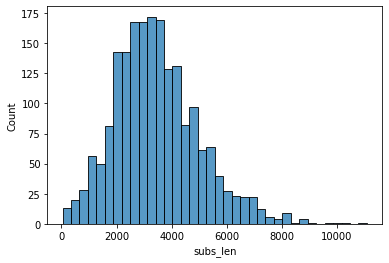

In [9]:
sns.histplot(data=df_subs['subs_len'])

In [10]:
df_kw = pd.read_csv('df_keylist_fifteen.csv', sep=';', index_col='imdb_id')
df_loaded = df_loaded.astype({'imdb_id': 'int32'})

df = df_kw.join(df_subs['subs_text'])
df = df.dropna()
df

,keylist_fifteen,subs_text
imdb_id,,
76759,"['android', 'spaceopera', 'rebellion', 'planet...","[hear, shut, main, reactor, destroy, sure, mad..."
109830,"['basedonnovel', 'love', 'friendship', 'flashb...","[hello, name, forrest, forrest, gump, want, ch..."
169547,"['nudity', 'femalenudity', 'malenudity', 'comi...","[need, father, role, model, horny, geek, boy, ..."
168629,"['murder', 'friendship', 'smalltown', 'robbery...","[sweat, know, im, excite, though, see, happen,..."
119116,"['love', 'alien', 'newyorkcity', 'future', 'sh...","[come, come, please, aziz, aziz, aziz, light, ..."
...,...,...
236784,"['dancing', 'spy', 'birthday', 'map', 'firewor...","[panama, panama, best, could, andrew, circumst..."
96969,"['vietnamveteran', 'posttraumaticstressdisorde...","[get, street, park, name, danny, topinka, bill..."
118929,"['soul', 'sleep', 'manipulation', 'future', 'd...","[confuse, frighten, thats, right, help, doctor..."


In [11]:
df

,keylist_fifteen,subs_text
imdb_id,,
76759,"['android', 'spaceopera', 'rebellion', 'planet...","[hear, shut, main, reactor, destroy, sure, mad..."
109830,"['basedonnovel', 'love', 'friendship', 'flashb...","[hello, name, forrest, forrest, gump, want, ch..."
169547,"['nudity', 'femalenudity', 'malenudity', 'comi...","[need, father, role, model, horny, geek, boy, ..."
168629,"['murder', 'friendship', 'smalltown', 'robbery...","[sweat, know, im, excite, though, see, happen,..."
119116,"['love', 'alien', 'newyorkcity', 'future', 'sh...","[come, come, please, aziz, aziz, aziz, light, ..."
...,...,...
236784,"['dancing', 'spy', 'birthday', 'map', 'firewor...","[panama, panama, best, could, andrew, circumst..."
96969,"['vietnamveteran', 'posttraumaticstressdisorde...","[get, street, park, name, danny, topinka, bill..."
118929,"['soul', 'sleep', 'manipulation', 'future', 'd...","[confuse, frighten, thats, right, help, doctor..."


In [12]:
df_sub_skip = pd.read_csv('fil_sub_download_temp_file.csv', sep=';', names=['imdb_id','moviename', 'data','file'])
df_sub_skip = df_sub_skip.astype({'imdb_id': 'int32','moviename': 'string','data': 'object','file': 'object'})
df_sub_skip = df_sub_skip.drop_duplicates(subset='imdb_id')
df_sub_skip = df_sub_skip.set_index('imdb_id')

In [13]:
df_sub_skip

,moviename,data,file
imdb_id,,,
76759,Star Wars: Episode IV - A New Hope,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1951740969': '/home/eva/Diploma/os/0076759.s...
109830,Forrest Gump,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1952039423': '/home/eva/Diploma/os/0109830.s...
169547,American Beauty,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1953328037': '/home/eva/Diploma/os/0169547.s...
168629,Dancer in the Dark,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1953190010': '/home/eva/Diploma/os/0168629.s...
119116,The Fifth Element,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1952183249': '/home/eva/Diploma/os/0119116.s...
...,...,...,...
236784,The Tailor of Panama,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1952268876': '/home/eva/Diploma/os/236784.srt'}
96969,Born on the Fourth of July,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1951662466': '/home/eva/Diploma/os/96969.srt'}
118929,Dark City,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1951976865': '/home/eva/Diploma/os/118929.srt'}


In [14]:
df_fullinfo = df_sub_skip.join(df, on='imdb_id')
df_fullinfo = df_fullinfo.dropna(axis=0)
df_fullinfo

,moviename,data,file,keylist_fifteen,subs_text
imdb_id,,,,,
76759,Star Wars: Episode IV - A New Hope,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1951740969': '/home/eva/Diploma/os/0076759.s...,"['android', 'spaceopera', 'rebellion', 'planet...","[hear, shut, main, reactor, destroy, sure, mad..."
109830,Forrest Gump,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1952039423': '/home/eva/Diploma/os/0109830.s...,"['basedonnovel', 'love', 'friendship', 'flashb...","[hello, name, forrest, forrest, gump, want, ch..."
169547,American Beauty,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1953328037': '/home/eva/Diploma/os/0169547.s...,"['nudity', 'femalenudity', 'malenudity', 'comi...","[need, father, role, model, horny, geek, boy, ..."
168629,Dancer in the Dark,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1953190010': '/home/eva/Diploma/os/0168629.s...,"['murder', 'friendship', 'smalltown', 'robbery...","[sweat, know, im, excite, though, see, happen,..."
119116,The Fifth Element,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1952183249': '/home/eva/Diploma/os/0119116.s...,"['love', 'alien', 'newyorkcity', 'future', 'sh...","[come, come, please, aziz, aziz, aziz, light, ..."
...,...,...,...,...,...
236784,The Tailor of Panama,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1952268876': '/home/eva/Diploma/os/236784.srt'},"['dancing', 'spy', 'birthday', 'map', 'firewor...","[panama, panama, best, could, andrew, circumst..."
96969,Born on the Fourth of July,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1951662466': '/home/eva/Diploma/os/96969.srt'},"['vietnamveteran', 'posttraumaticstressdisorde...","[get, street, park, name, danny, topinka, bill..."
118929,Dark City,"{'MatchedBy': 'imdbid', 'IDSubMovieFile': '0',...",{'1951976865': '/home/eva/Diploma/os/118929.srt'},"['soul', 'sleep', 'manipulation', 'future', 'd...","[confuse, frighten, thats, right, help, doctor..."


In [15]:
df_fullinfo.to_csv('df_fullinfo.csv', sep=';')